# **📌 Extracción y Transformación**

In [27]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df = pd.concat(
    [
        df[['customerID', 'Churn']],
        customer_df,
        phone_df,
        internet_df,
        account_df
    ],
    axis=1
)

df = df.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
})

print("INFO GENERAL\n")
df.info()

print("\nTIPOS DE DATOS\n")
print(df.dtypes)

print("\nVALORES NULOS\n")
print(df.isna().sum())

print("\nDUPLICADOS\n")
print(df.duplicated().sum())

df = df.apply(lambda col: col.str.lower().str.strip() if col.dtype == "object" else col)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30

df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

columnas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
]

for col in columnas_binarias:
    df[col] = df[col].map({'yes': 1, 'no': 0})

columnas_relevantes = [
    'Churn',
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Cuentas_Diarias',
    'Contract',
    'PaymentMethod',
    'InternetService'
]

print("\nDATASET FINAL LISTO PARA ANÁLISIS\n")
display(df[columnas_relevantes].head())

df[columnas_relevantes].info()


INFO GENERAL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-n

,Churn,tenure,MonthlyCharges,TotalCharges,Cuentas_Diarias,Contract,PaymentMethod,InternetService
0,0.0,9,65.6,593.30,2.186667,one year,mailed check,dsl
1,0.0,9,59.9,542.40,1.996667,month-to-month,mailed check,dsl
2,1.0,4,73.9,280.85,2.463333,month-to-month,electronic check,fiber optic
3,1.0,13,98.0,1237.85,3.266667,month-to-month,electronic check,fiber optic
4,1.0,3,83.9,267.40,2.796667,month-to-month,mailed check,fiber optic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7043 non-null   float64
 1   tenure           7267 non-null   int64  
 2   MonthlyCharges   7267 non-null   float64
 3   TotalCharges     7256 non-null   float64
 4   Cuentas_Diarias  7267 non-null   float64
 5   Contract         7267 non-null   object 
 6   PaymentMethod    7267 non-null   object 
 7   InternetService  7267 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 454.3+ KB


# **📊 Carga y análisis**

ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS



,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


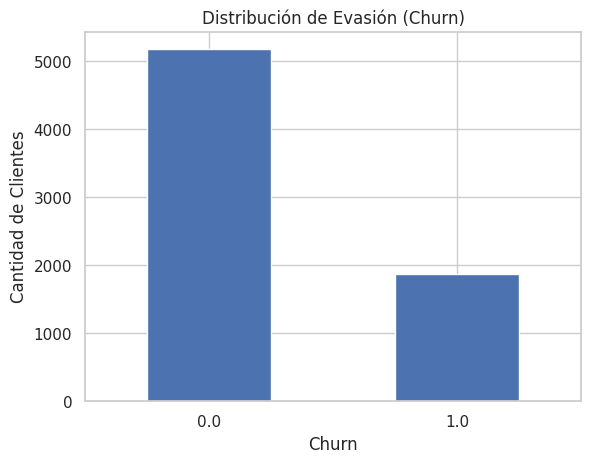


Proporción de Churn:


,proportion
Churn,
0.0,73.463013
1.0,26.536987


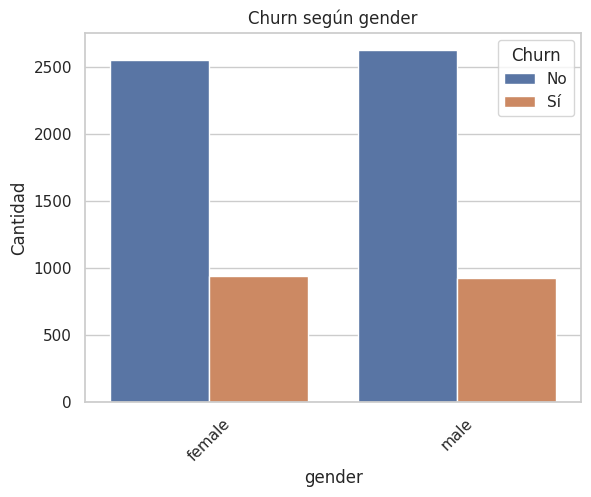

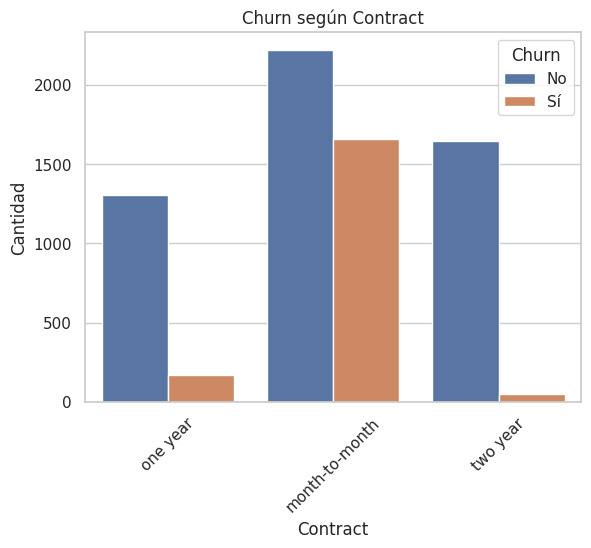

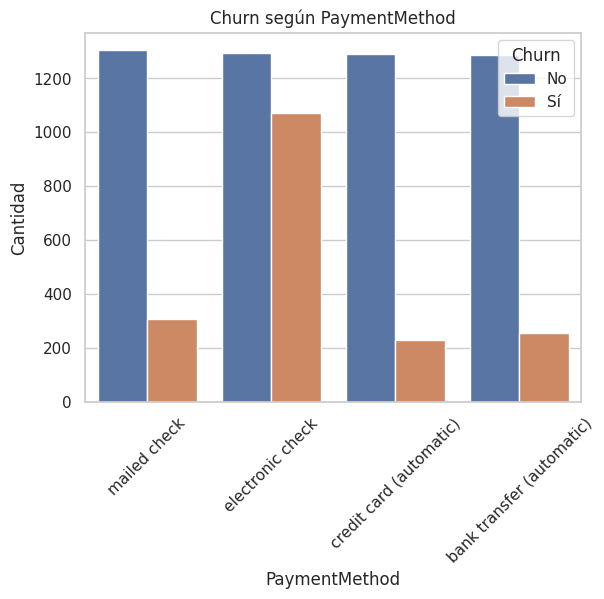

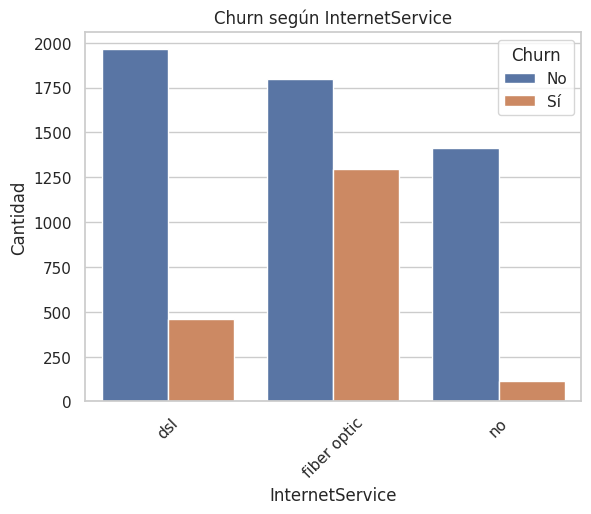

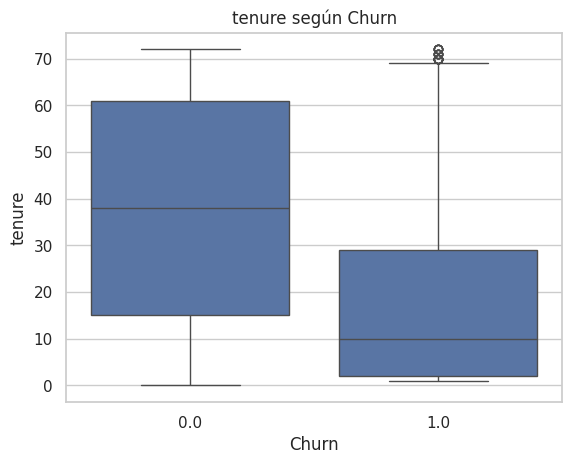

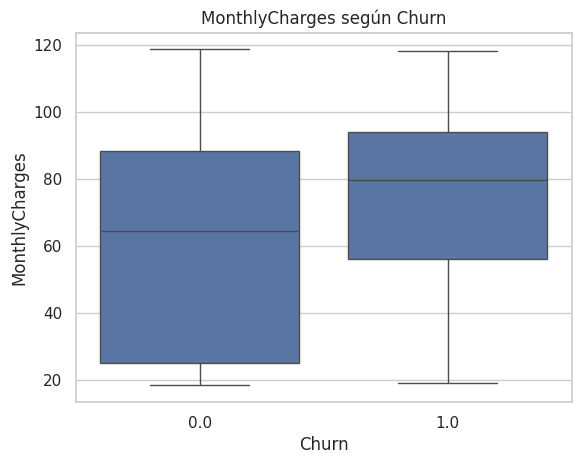

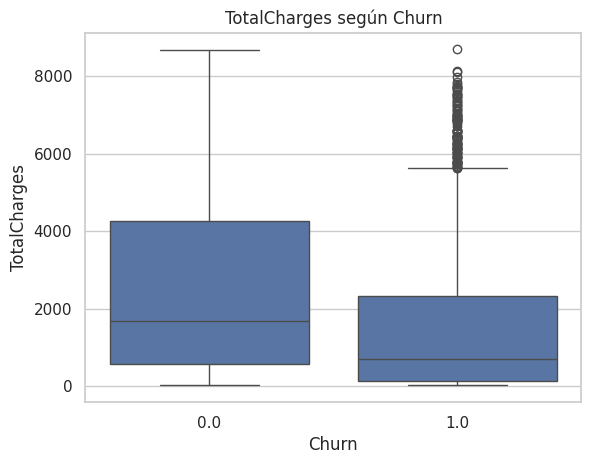

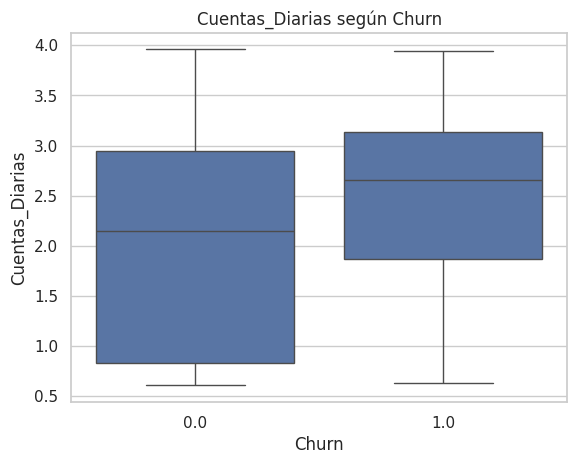

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print("ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS\n")
display(df.describe())

plt.figure()
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

print("\nProporción de Churn:")
display(df['Churn'].value_counts(normalize=True) * 100)

variables_categoricas = [
    'gender',
    'Contract',
    'PaymentMethod',
    'InternetService'
]

for col in variables_categoricas:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn según {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.show()

variables_numericas = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Cuentas_Diarias'
]

for col in variables_numericas:
    plt.figure()
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


# **📄Informe final**

## ***📊 Análisis de Evasión de Clientes  – Telecom X***



### **Introducción**

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes en Telecom X.
La evasión ocurre cuando un cliente decide cancelar el servicio, lo que representa una pérdida directa de ingresos y un aumento en los costos de adquisición de nuevos clientes.

A través del análisis de datos históricos de clientes (incluyendo información demográfica, tipo de contrato, servicios contratados y gastos) buscamos identificar patrones y comportamientos asociados a una mayor probabilidad de cancelación, con el fin de proponer acciones que ayuden a reducir la evasión y mejorar la retención.

### **Limpieza y Tratamiento de Datos**

Los datos fueron obtenidos directamente desde una API en formato JSON, y posteriormente convertidos en un DataFrame de Pandas para facilitar su análisis.

Durante el proceso de preparación de los datos se realizaron los siguientes pasos:

1. Carga y normalización de los datos provenientes de la API.
2. Exploración de la estructura del dataset (info() y dtypes()).
3. Verificación de valores nulos y filas duplicadas.
4. Conversión de columnas numéricas que estaban almacenadas como texto (por ejemplo, cargos totales).
5. Corrección de inconsistencias en variables categóricas.
6. Estandarización de valores binarios (Sí/No → 1/0).
7. Creación de una nueva variable Cuentas_Diarias, calculada a partir del cargo mensual, para obtener una visión más granular del comportamiento de gasto de los clientes.

Estos pasos aseguraron que los datos fueran consistentes, completos y adecuados para el análisis exploratorio.



### **Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio permitió comprender mejor la distribución de las variables y su relación con la evasión de clientes.

1. Distribución de Churn: Se observó una proporción significativa de clientes que cancelaron el servicio, lo que refuerza la importancia de analizar este fenómeno para la toma de decisiones estratégicas.

2. Churn y Variables Categóricas:

El análisis visual mostró patrones claros en variables como:
- Tipo de contrato: los contratos mensuales presentan una mayor tasa de evasión.
- Método de pago: ciertos métodos están asociados a una mayor probabilidad de churn.
- Servicio de internet: el tipo de servicio contratado influye en la permanencia del cliente.

3. Churn y Variables Numéricas:

Al comparar clientes que cancelaron y los que permanecieron:
- Los clientes con menor antigüedad (tenure) tienden a evadir con mayor frecuencia.
- Los clientes que cancelan suelen tener menor gasto total acumulado.

El análisis de cargos diarios permitió observar diferencias claras en el comportamiento de consumo.

Las visualizaciones (gráficos de barras, boxplots y conteos) fueron clave para identificar estos patrones de manera intuitiva.

### **Conclusiones e Insights**

A partir del análisis realizado, se destacan los siguientes hallazgos:
1. La evasión es más frecuente en clientes con contratos de corto plazo.
2. Los clientes nuevos presentan mayor riesgo de cancelación.
3. El método de pago y el tipo de servicio contratado influyen significativamente en la decisión de abandonar.
4. Un menor gasto total y menor tiempo de permanencia están asociados con una mayor probabilidad de churn.

Estos insights permiten identificar perfiles de clientes con mayor riesgo, lo que es fundamental para diseñar estrategias de retención más efectivas.

### **Recomendaciones**

Basándose en los resultados del análisis, se proponen las siguientes acciones:

1. Incentivar contratos de mayor duración mediante descuentos o beneficios exclusivos.
2. Implementar estrategias de fidelización durante los primeros meses del cliente.
3. Revisar los métodos de pago asociados a mayor evasión y ofrecer alternativas más convenientes.
4. Diseñar campañas personalizadas para clientes con bajo gasto acumulado o bajo tiempo de permanencia.

Utilizar estos insights como base para desarrollar un modelo predictivo de churn que permita anticiparse a la cancelación.